In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_train shape (1257, 64)

Example Digit 3


<Figure size 432x288 with 0 Axes>

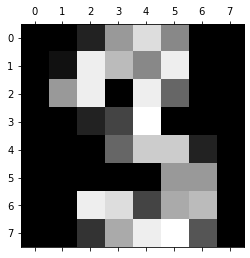

In [5]:
import matplotlib.pyplot as plt
plt.gray()


def load_ds():
    ds = load_digits()
    X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, test_size=0.3, random_state=10)
    print("X_train shape", X_train.shape)
    print("\nExample Digit", y_train[11])
    plt.matshow(X_train[11].reshape(8, -1))
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = load_ds()

In [12]:
def find_correct_num_components(X_train):
    ds_variance = np.mean(np.square(np.linalg.norm(X_train, axis=1)))
    n = []
    projection_errors = []
    for n_components in range(1, X_train.shape[-1]-1):
        clf = PCA(n_components=n_components)
        clf.fit(X_train)
        X_projected = clf.inverse_transform(clf.transform(X_train))
        projection_error = np.mean(np.square(np.linalg.norm(X_train - X_projected, axis=1)))
        n.append(n_components)
        projection_errors.append(projection_error / ds_variance)
    plt.scatter(n, projection_errors)
    

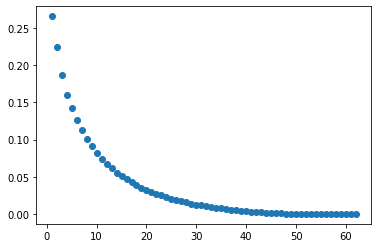

In [13]:
find_correct_num_components(X_train)